In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pip install mendeleev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.1/353.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.8/865.8 kB 41.5 MB/s eta 0:00:00


In [3]:
pip install bilby

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.1 MB/s eta 0:00:00


In [4]:
pip install pymultinest==2.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.7 MB/s eta 0:00:00


In [5]:
pip install juliet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 kB 16.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 11.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
import math
import sys
import numpy as np
import pandas as pd
from numpy import linspace, arange, zeros
from matplotlib.pylab import plt
from mendeleev import element
from bilby import result
import bilby
import seaborn as sns

In [7]:
label = 'ldm'
outdir = 'outdir'
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir)

In [8]:
Z, N, BE_EXP = np.loadtxt('even-even.dat',usecols=(0,1,2), unpack= True)
A = Z + N
az = np.vstack((A,Z))
x = az

data = -BE_EXP
ndata = len(data)
P = open('results.out','w')
print('ndata=',ndata, file=P)

In [9]:
def model(az,a_v,a_s,a_a,a_c,a_p):
    a=az[0,:]
    z=az[1,:]
    a13 = pow(a,0.3333)
    zz1 = z*z
    nz = a -2*z
    nz2 = pow(nz , 2.0)
    a_p=(-34)


    BE=  a_v*a + a_s*a**(2.0/3.0)+ a_c*zz1/a13 + a_a*(nz2/a)-a_p*a**(-0.75)
    return BE

In [10]:
injection_parameters = dict(a_v=-14, a_s=18, a_a=23, a_c=0.7, a_p=34)
n = len(Z)
sigma = np.random.normal(1, 0.01, n)
sigma = 3.075

In [11]:
likelihood = bilby.likelihood.GaussianLikelihood(az, data, model,
sigma)

In [12]:
priors = dict()
priors['a_v'] = bilby.core.prior.Uniform(-30,-10 , '$a_v$',unit='MeV')
priors['a_s'] = bilby.core.prior.Uniform(0,25, '$a_s$',unit='MeV')
priors['a_a'] = bilby.core.prior.Uniform(15, 50, '$a_a$',unit='MeV')
priors['a_c'] = bilby.core.prior.Uniform(1,5,'$a_c$',unit='MeV')
priors['a_p'] = bilby.core.prior.Uniform(20,34,'$a_p$', unit='MeV' )
#priors['a_p'] = bilby.core.prior.Normal(34,5,'$a_p$', unit='MeV' )

In [13]:
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='dynesty', nlive=500,
    sample='unif', injection_parameters=injection_parameters, outdir=outdir,
    label=label)
result.plot_corner(priors=True,label_kwargs={"fontsize": 25},title_kwargs=dict(fontsize=20),max_n_ticks=3,smooth=1.0)
result.plot_marginals()
print( result.log_evidence, result.log_evidence_err,
            np.log(result.occam_factor(priors)))

06:34 bilby INFO    : Running for label 'ldm', output will be saved to 'outdir'
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
06:34 bilby INFO    : Analysis priors:
06:34 bilby INFO    : a_v=Uniform(minimum=-30, maximum=-10, name='$a_v$', latex_label='$a_v$', unit='MeV', boundary=None)
06:34 bilby INFO    : a_s=Uniform(minimum=0, maximum=25, name='$a_s$', latex_label='$a_s$', unit='MeV', boundary=None)
06:34 bilby INFO    : a_a=Uniform(minimum=15, maximum=50, name='$a_a$', latex_label='$a_a$', unit='MeV', boundary=None)
06:34 bilby INFO    : a_c=Uniform(minimum=1, maximum=5, name='$a_c$', latex_label='$a_c$', unit='MeV', boundary=None)
06:34 bilby INFO    : a_p=Uniform(minimum=20, maximum=34, name='$a_p$', latex_label='$a_p$', unit='MeV', boundary=None)
06:34 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
06:34 bi

1it [00:00, ?it/s]

06:36 bilby INFO    : Written checkpoint file outdir/ldm_resume.pickle
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImpo

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

-24039.39132616815 0.3301314957173079 -55.492296138188294


In [14]:
av_fit=result.get_one_dimensional_median_and_error_bar('a_v')
av1 = av_fit.median
as_fit=result.get_one_dimensional_median_and_error_bar('a_s')
as1 = as_fit.median
aa_fit=result.get_one_dimensional_median_and_error_bar('a_a')
aa1 = aa_fit.median
ac_fit=result.get_one_dimensional_median_and_error_bar('a_c')
ac1 = ac_fit.median
ap_fit=result.get_one_dimensional_median_and_error_bar('a_p')
ap1 = ap_fit.median
print(av1,as1,aa1,ac1,ap1)
data_fit = model(az,av1,as1,aa1,ac1,ap1)

-18.893200741792633 24.999821637205432 30.41796544120993 1.0000026854768513 26.98072387538999


In [15]:
cov_mat = result.covariance_matrix
nrow,ncol=np.shape(cov_mat)
print('row and columns',nrow,ncol)
corr=np.empty((nrow,ncol))
for i in range(0,nrow):
    for j in range(0,ncol):
        corr[i][j]=cov_mat[i][j] /np.sqrt(cov_mat[i][i]*cov_mat[j][j])
#output=open('results.out','w')
np.set_printoptions(precision=3)
#print(corr,file=output)
#print('Correlationmatrix',file=P)
#print(corr,file=P)
#utput.close()
print(corr)

row and columns 5 5
[[ 1.    -0.019 -0.902 -0.016  0.008]
 [-0.019  1.    -0.004 -0.056 -0.003]
 [-0.902 -0.004  1.     0.017 -0.026]
 [-0.016 -0.056  0.017  1.    -0.04 ]
 [ 0.008 -0.003 -0.026 -0.04   1.   ]]


In [16]:
print(corr)

[[ 1.    -0.019 -0.902 -0.016  0.008]
 [-0.019  1.    -0.004 -0.056 -0.003]
 [-0.902 -0.004  1.     0.017 -0.026]
 [-0.016 -0.056  0.017  1.    -0.04 ]
 [ 0.008 -0.003 -0.026 -0.04   1.   ]]


<Axes: >

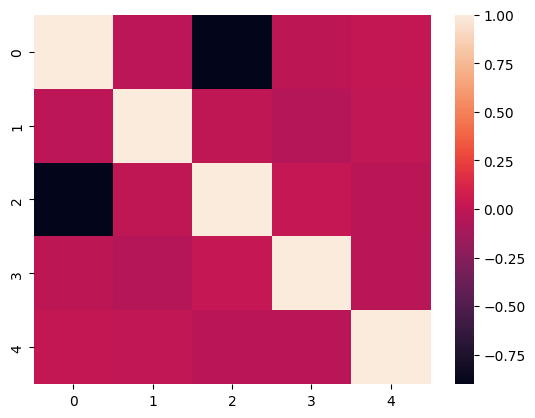

In [17]:
sns.heatmap(corr)

In [18]:
print('Parameters', file =P)
data1 = { 'av':[av_fit.median], 'plus':[av_fit.plus], 'minus':[av_fit.minus]}
data2 = { 'as':[as_fit.median], 'plus':[as_fit.plus], 'minus':[as_fit.minus]}
data3 = { 'aa':[aa_fit.median], 'plus':[aa_fit.plus], 'minus':[aa_fit.minus]}
data4 = { 'ac':[ac_fit.median], 'plus':[ac_fit.plus], 'minus':[ac_fit.minus]}
data5 = { 'ap':[ap_fit.median], 'plus':[ap_fit.plus], 'minus':[ap_fit.minus]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)
df5 = pd.DataFrame(data5)
print(df1.to_string(index=False),file=P)
print(df2.to_string(index=False),file=P)
print(df3.to_string(index=False),file=P)
print(df4.to_string(index=False),file=P)
print(df5.to_string(index=False),file=P)

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [19]:
H=open('fit.out','w')

data6={'Z':Z, 'N':N, 'BE_EXP':BE_EXP, 'BE_FIT':data_fit}
df=pd.DataFrame(data6)
print(df.to_string(index=False),file=H)
H.close()

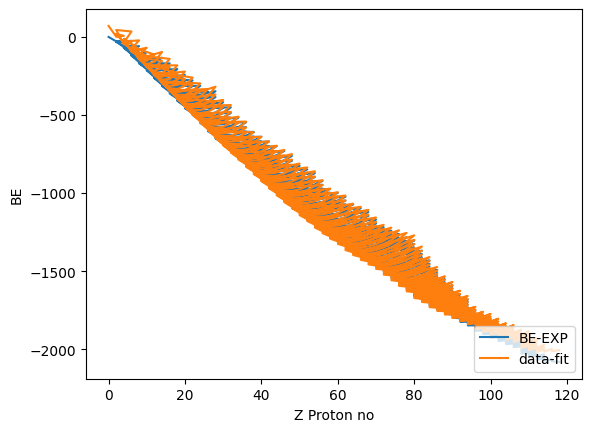

In [20]:
plt.plot(Z,-BE_EXP )
plt.plot(Z, data_fit)


plt.xlabel('Z Proton no')

plt.ylabel('BE')


plt.legend(["BE-EXP", "data-fit"], loc ="lower right")

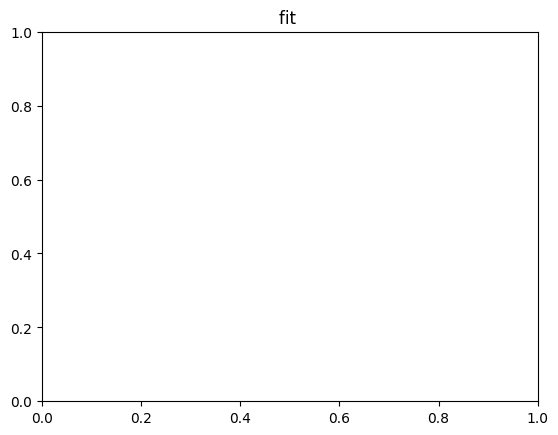

In [21]:
# giving a title to my graph
plt.title('fit ')

# function to show the plot

plt.savefig('fit.png') #.format(outdir, label))

In [22]:
plt.show()
chisq = np.sum(((data-data_fit)/sigma)**2.0)
#J = open('chi.out','w')
data5={'Chi2=':[chisq]}
df5 = pd.DataFrame(data5)
print(df5.to_string(index=False),file=P)
#J.close()

P.close()
print ('chisq',chisq)

chisq 44377.403277803234
